# **Examen práctico - Curso: Aprendizaje Automático**

**Estudiante:** David Alejandro Narváez Mejia

**Fecha:** 17/05/2025

**Materia:** Aprenizaje Automatico - MIAR0525

**Profesor:** Gladys Villegas R. PhD(C)

**Referencias:**


[1] Satisfaccion_Clientes

[2] Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd ed.). O'Reilly Media.

# **PASO 1 - Carga de librerias y carga datset via online**

In [55]:
# ============================================================
# Instalacion de librerias para procesamiento de datos y EDA
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Cargar el dataset
# Use the raw content URL instead
# The 'raw' URL points directly to the content of the file, not the GitHub page
df = pd.read_csv('https://raw.githubusercontent.com/DAVOALEJO1987/ML-CLASIFICACION/main/Satisfaccion_Clientes.csv')
df

,cliente_id,tiempo_respuesta_horas,incidentes_reportados,compras_exitosas,tiempo_como_cliente_meses,descuento_promedio_pct,calificacion_producto,satisfaccion
0,C0001,14.5,0,15,1,21.13,5.0,0
1,C0002,34.7,1,10,51,25.46,3.0,0
2,C0003,21.5,1,10,16,15.17,1.0,0
3,C0004,28.5,1,21,35,11.66,2.0,0
4,C0005,22.3,1,12,24,17.98,2.0,0
...,...,...,...,...,...,...,...,...
995,C0996,28.3,2,11,45,12.72,2.0,0
996,C0997,26.9,2,21,47,6.86,2.0,0
997,C0998,32.5,0,16,6,11.02,5.0,0
998,C0999,33.5,1,16,20,NaN,1.0,0


# **PASO 2 - Exploración inicial y comprensión del dataset Análisis Estadistica Descriptiva**


Valores
  cliente_id  tiempo_respuesta_horas  incidentes_reportados  compras_exitosas  \
0      C0001                    14.5                      0                15   
1      C0002                    34.7                      1                10   
2      C0003                    21.5                      1                10   
3      C0004                    28.5                      1                21   
4      C0005                    22.3                      1                12   

   tiempo_como_cliente_meses  descuento_promedio_pct  calificacion_producto  \
0                          1                   21.13                    5.0   
1                         51                   25.46                    3.0   
2                         16                   15.17                    1.0   
3                         35                   11.66                    2.0   
4                         24                   17.98                    2.0   

   satisfaccion  
0          

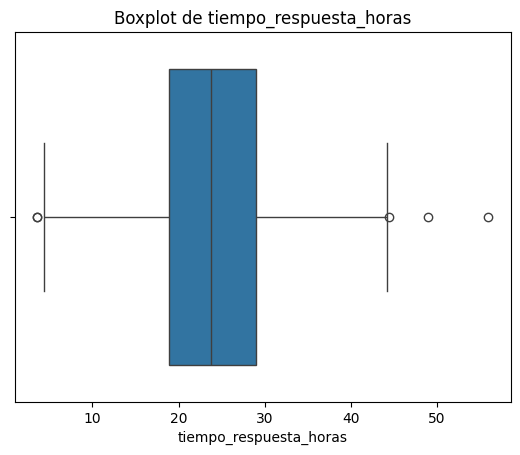

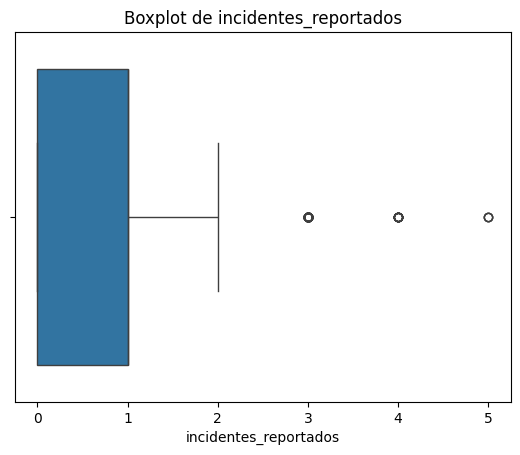

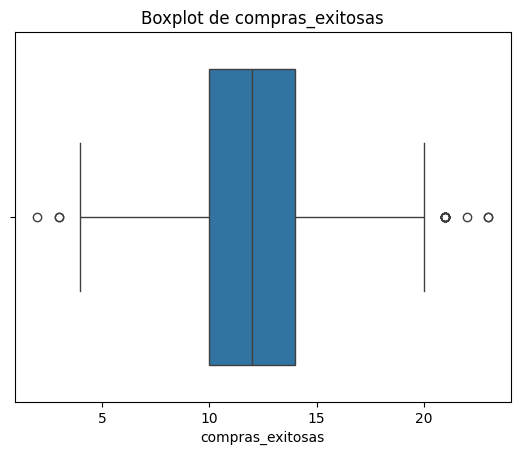

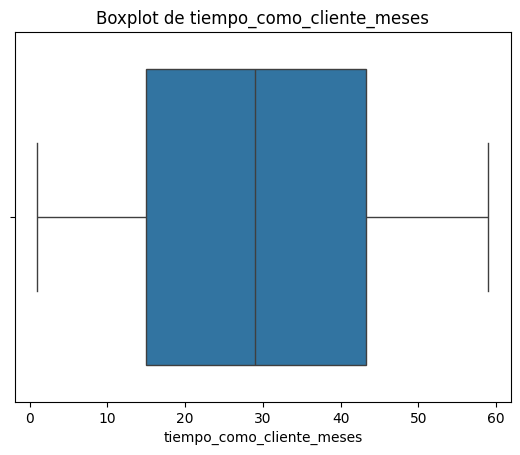

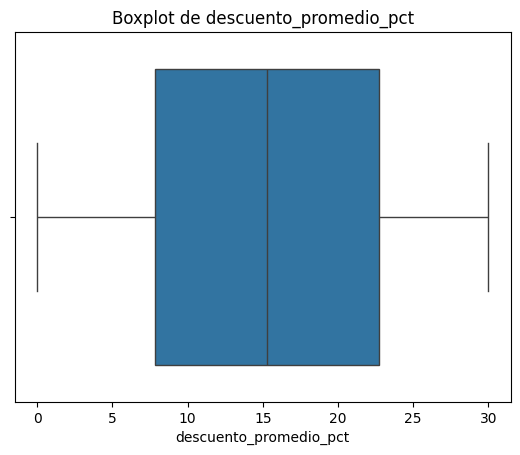

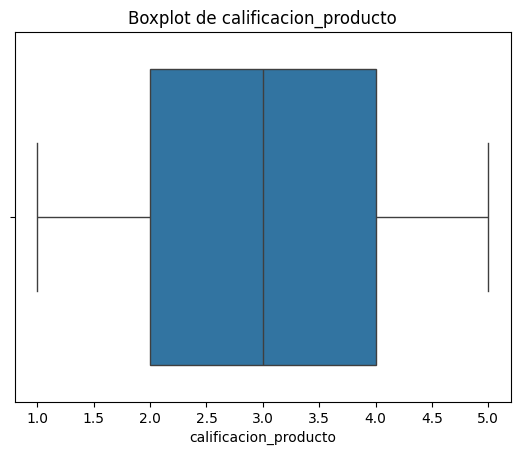

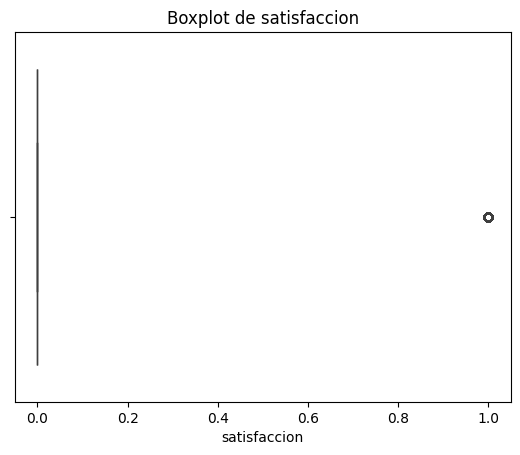


Resumen estadístico:
       tiempo_respuesta_horas  incidentes_reportados  compras_exitosas  \
count             1000.000000            1000.000000       1000.000000   
mean                24.084200               0.945000         12.047000   
std                  7.790344               0.956499          3.441022   
min                  3.600000               0.000000          2.000000   
25%                 18.900000               0.000000         10.000000   
50%                 23.800000               1.000000         12.000000   
75%                 29.025000               1.000000         14.000000   
max                 56.000000               5.000000         23.000000   

       tiempo_como_cliente_meses  descuento_promedio_pct  \
count                1000.000000             1000.000000   
mean                   29.398000               15.264710   
std                    16.664672                8.515112   
min                     1.000000                0.020000   
25%        

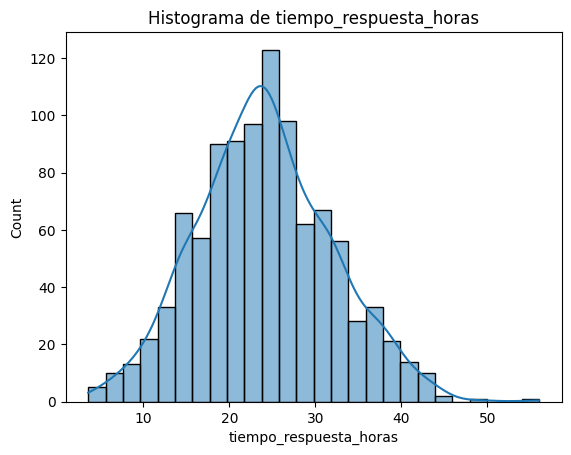

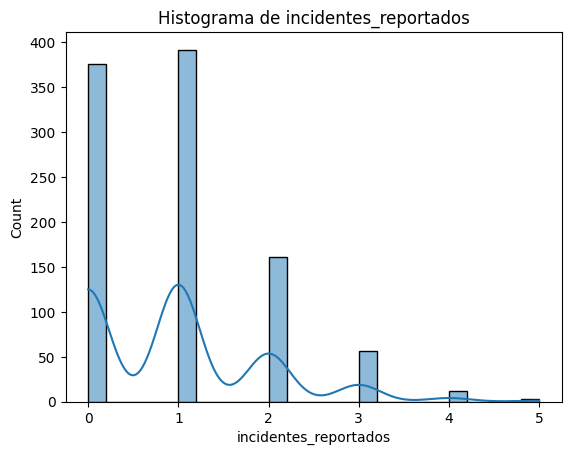

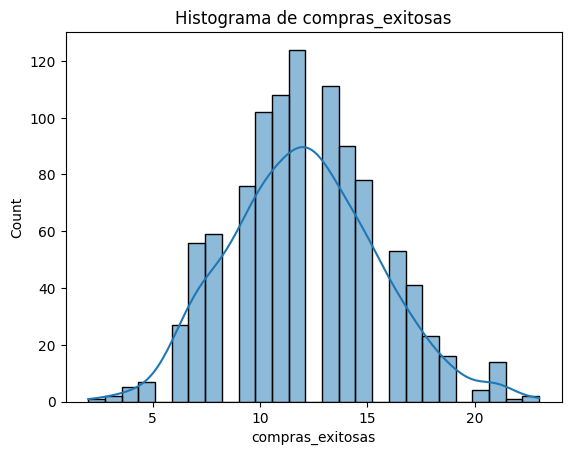

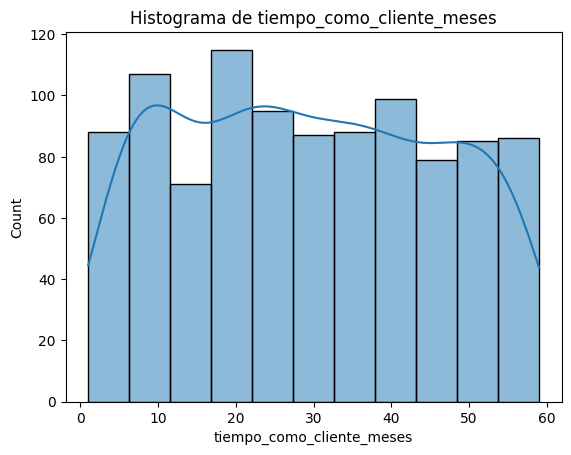

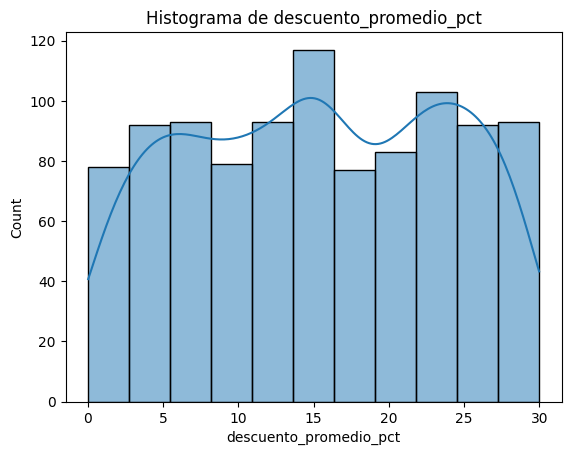

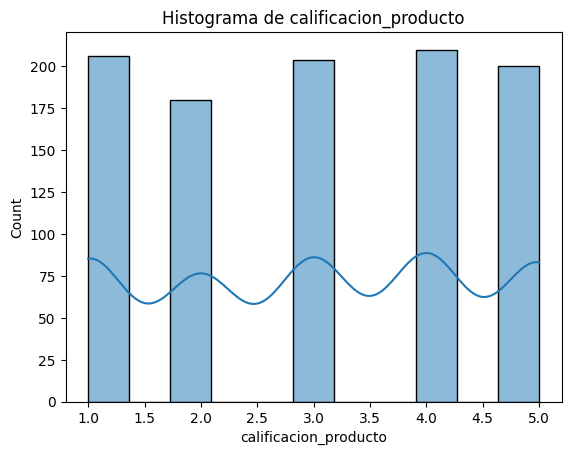

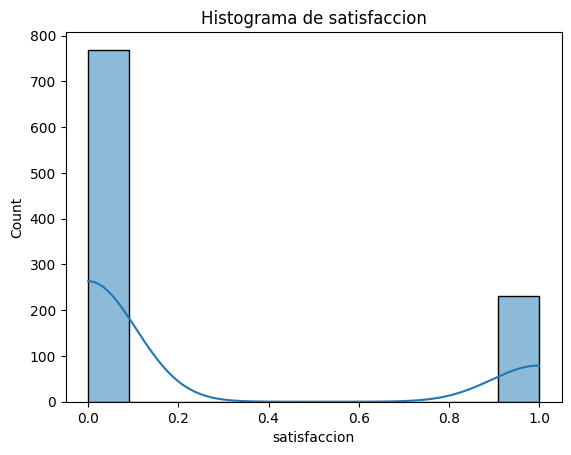

  cliente_id  tiempo_respuesta_horas  incidentes_reportados  compras_exitosas  \
0      C0001                    14.5                      0                15   
1      C0002                    34.7                      1                10   
2      C0003                    21.5                      1                10   
3      C0004                    28.5                      1                21   
4      C0005                    22.3                      1                12   

   tiempo_como_cliente_meses  descuento_promedio_pct  calificacion_producto  \
0                          1                   21.13                    5.0   
1                         51                   25.46                    3.0   
2                         16                   15.17                    1.0   
3                         35                   11.66                    2.0   
4                         24                   17.98                    2.0   

   satisfaccion  
0             0  
1 

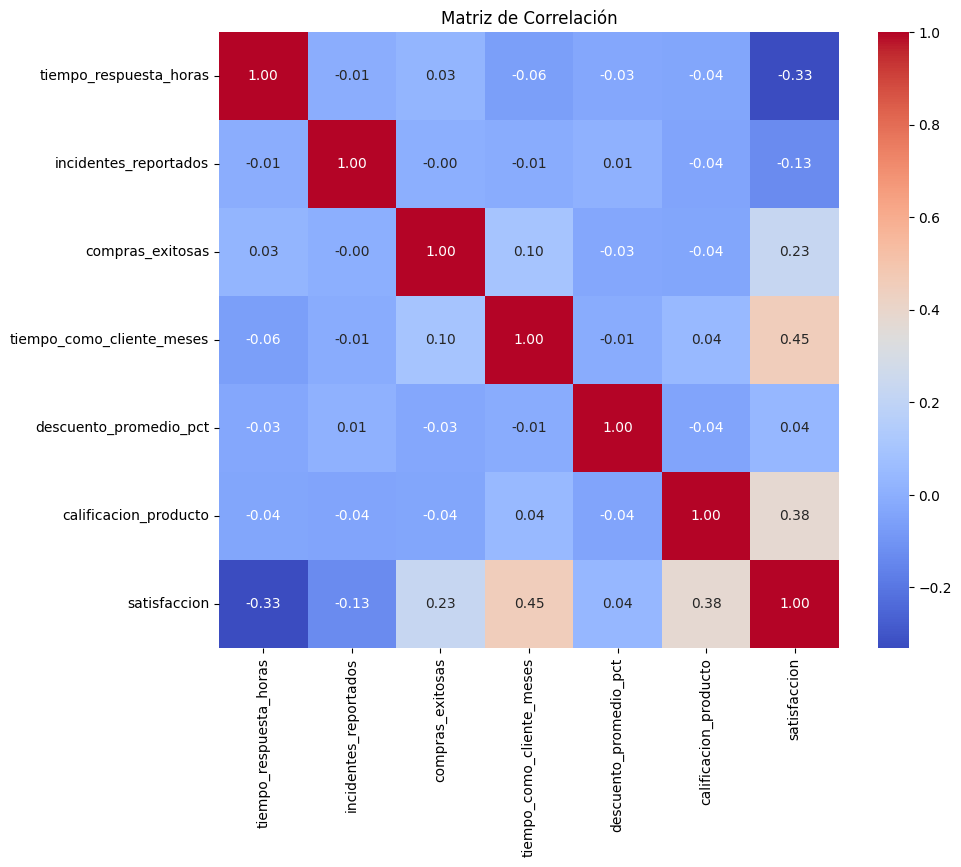

In [57]:
# Mostrar primeras filas
print("\nValores")
print(df.head())

# -------------------------------
# Verificación de valores nulos
# -------------------------------
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Reemplazo o eliminación de nulos
# Ejemplo: relleno con la mediana para columnas numéricas
df.fillna(df.median(numeric_only=True), inplace=True)

# -------------------------------
# Eliminación de duplicados
# -------------------------------
print("\nNúmero de filas duplicadas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# -------------------------------
# Manejo de datos inconsistentes
# -------------------------------
# Imprimir los nombres de las columnas para verificar si 'DATE' existe y cómo está escrito
print("\nNombres de las columnas en el DataFrame:")
print(df.columns)

# -------------------------------
# Verificar tipos de datos después de la conversión
# -------------------------------
print("\nTipos de datos después de la limpieza:")
print(df.dtypes)

# -------------------------------
# Verificación de valores atípicos
# -------------------------------
# Boxplots para identificar outliers
# Regenerar la lista de variables numéricas just in case columns were removed
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

for var in variables_numericas:
    plt.figure()
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

# -------------------------------
# Análisis Exploratorio (EDA)
# -------------------------------
print("\nResumen estadístico:")
print(df.describe())

# Histograma por variable numérica
for var in variables_numericas:
    plt.figure()
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')
    plt.show()

print(df.head())
print(df.info())
print(df.describe())

# -------------------------------
# Análisis de Correlación
# -------------------------------
# Ensure correlation is calculated only on numeric columns
plt.figure(figsize=(10, 8))
# Recalculate correlation_matrix in case variables_numericas changed
correlation_matrix = df[variables_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

# 🧠 Insight 1:
**Análisis de Correlación de Satisfacción del Cliente**

La matriz de correlación permite identificar cómo se relacionan numéricamente las variables del dataset con respecto a la satisfacción del cliente. En este caso, el análisis revela las siguientes relaciones destacadas:

📉 Correlaciones Negativas:
Tiempo de respuesta en horas (-0.33): Existe una correlación negativa significativa. A mayor tiempo que tarda la empresa en responder, menor es la satisfacción del cliente. Esta es una variable crítica a optimizar.

Incidentes reportados (-0.13): Aunque la correlación es más débil, indica que a mayor número de problemas reportados por el cliente, menor es su satisfacción. Esto confirma la importancia de la calidad operativa.

📈 Correlaciones Positivas:
Tiempo como cliente (0.45): Clientes con mayor antigüedad tienden a estar más satisfechos. Esto puede indicar fidelidad o una mejor adaptación del servicio con el tiempo.

Calificación del producto (0.38): Las valoraciones positivas del producto están fuertemente relacionadas con la satisfacción global. Mejorar la percepción del producto puede tener un alto impacto.

Compras exitosas (0.23): Existe una relación positiva moderada. Más compras exitosas sugieren mayor engagement y satisfacción.

❗ Variables con baja correlación:
Descuento promedio (%) (0.04): A pesar de que los descuentos son un incentivo, no parecen tener una relación significativa directa con la satisfacción en este contexto.

**✅ Conclusión y Recomendaciones:**

Optimizar el tiempo de respuesta al cliente y reducir incidentes deben ser prioridades.

Fomentar la fidelización y asegurar la calidad del producto son claves para aumentar la satisfacción.

Variables como descuentos, aunque valiosas desde un punto de vista comercial, no son determinantes en la percepción del cliente según este análisis.

# **PASO 2 - Optimización del dataset y Vizualización de distribución**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tiempo_respuesta_horas     1000 non-null   float64
 1   tiempo_como_cliente_meses  1000 non-null   int64  
 2   calificacion_producto      1000 non-null   float64
 3   satisfaccion               1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB
None
       tiempo_respuesta_horas  tiempo_como_cliente_meses  \
count             1000.000000                1000.000000   
mean                24.084200                  29.398000   
std                  7.790344                  16.664672   
min                  3.600000                   1.000000   
25%                 18.900000                  15.000000   
50%                 23.800000                  29.000000   
75%                 29.025000                  43.250000   
max                 56.

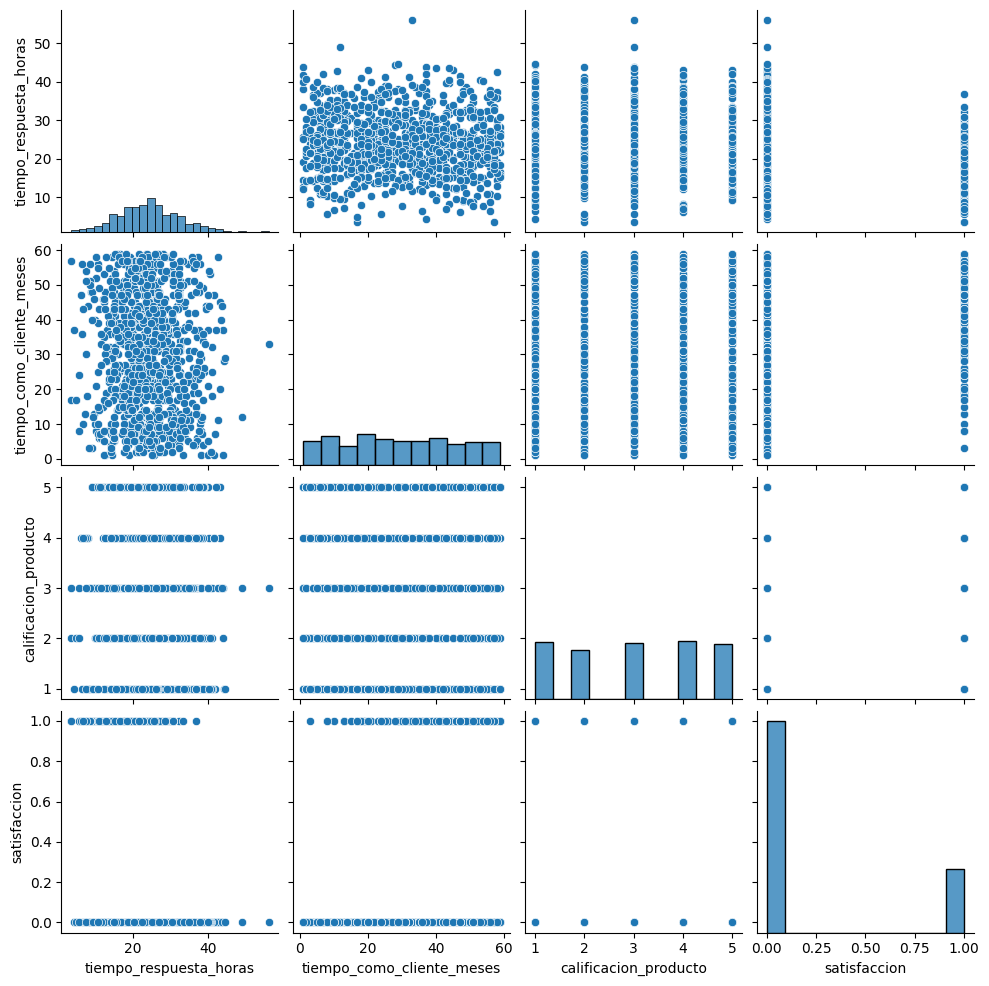

In [58]:
# ============================================================
# Optimizacion del datset
# ============================================================

# -------------------------------
# Eliminamos columnas que no vamos a utilizar
# -------------------------------
# Asegurarse de que las columnas existan antes de intentar eliminarlas
columns_to_drop = ['cliente_id' , 'incidentes_reportados', 'compras_exitosas', 'descuento_promedio_pct']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)
else:
    print("Las columnas a eliminar no se encontraron en el DataFrame.")


# -------------------------------
# Estadistica descriptiva
# -------------------------------
print(df.info())
print(df.describe())

# -------------------------------
# Visualización de la distribución
# -------------------------------
# Ensure the columns used for pairplot still exist after dropping some
# Revisa qué columnas quedan en el DataFrame después de eliminarlas
print("Columnas restantes para pairplot:", df.columns)
# Adjust the columns used in pairplot based on the remaining columns
# For example, if 'cliente_id' etc. are removed, you cannot use them in pairplot
# Let's assume you want to visualize the remaining numerical columns
variables_para_pairplot = df.select_dtypes(include=[np.number]).columns.tolist()
if variables_para_pairplot: # Check if there are any numerical columns left
    sns.pairplot(df[variables_para_pairplot])
    plt.show()
else:
    print("No hay variables numéricas restantes para el pairplot.")

# 🧠 Insight 2:
Análisis Exploratorio: Satisfacción del Cliente
1. Introducción
Este informe contiene un análisis exploratorio de los datos relacionados con la satisfacción de clientes. Se incluyen estadísticas descriptivas, análisis de correlación y visualizaciones clave que permiten comprender los factores que influyen en la satisfacción del cliente.
2. Análisis de Correlación
La matriz de correlación revela relaciones importantes entre las variables del dataset. Destacan las siguientes observaciones:
- Tiempo de respuesta (horas) tiene una correlación negativa con la satisfacción (-0.33).
- Tiempo como cliente muestra una correlación positiva significativa (0.45).
- Calificación del producto también está positivamente correlacionada con la satisfacción (0.38).
3. Análisis Visual (Pairplot)
El gráfico de dispersión múltiple (pairplot) permite observar visualmente las relaciones entre variables numéricas claves. Se destacan los siguientes hallazgos:
- Clientes con menor tiempo de respuesta tienen mayor probabilidad de estar satisfechos.
- A mayor tiempo como cliente, mayor tendencia a la satisfacción.
- Calificaciones más altas del producto se asocian con niveles altos de satisfacción.
- La variable de satisfacción está desbalanceada: predominan los valores 0.


# **PASO 3 - Carga de librerias para ML y ENTRENAMIENTO**

In [62]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Matriz de Confusión:
[[209  11]
 [ 21  59]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       220
         1.0       0.84      0.74      0.79        80

    accuracy                           0.89       300
   macro avg       0.88      0.84      0.86       300
weighted avg       0.89      0.89      0.89       300

Accuracy del modelo: 0.89


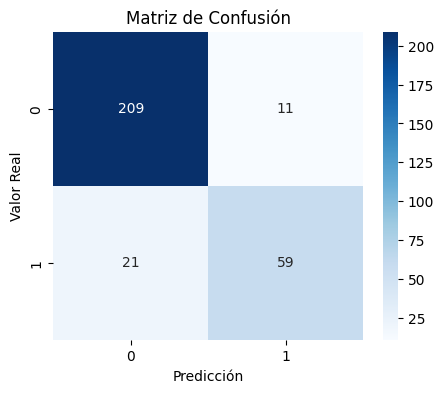

In [64]:
# Paso 3: Cargar el dataset
df = pd.read_csv('Satisfaccion_Clientes.csv')

# Paso 4: Preprocesamiento
# Eliminar la columna 'cliente_id' porque no aporta al modelo
df.drop('cliente_id', axis=1, inplace=True)

# Imputar valores nulos con la media
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separar variables predictoras (X) y variable objetivo (y)
X = df_imputed.drop('satisfaccion', axis=1)
y = df_imputed['satisfaccion']

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Paso 5: Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Paso 6: Evaluación del modelo
y_pred = model.predict(X_test)

# Reportes
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"Accuracy del modelo: {accuracy_score(y_test, y_pred):.2f}")

# Visualización de la matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


# 🧠 Insight 3:
El modelo supervisado desarrollado para predecir la satisfacción del cliente muestra un desempeño robusto con una exactitud del 89%. La matriz de confusión indica que el modelo identifica correctamente a 209 clientes insatisfechos y 59 satisfechos, mientras comete 32 errores en total. La precisión para la clase insatisfecha es del 91% y del 84% para la clase satisfecha, lo que evidencia un buen nivel de predicción. Sin embargo, el recall de la clase satisfecha es menor (74%), lo que sugiere que algunos clientes satisfechos no están siendo identificados correctamente. El F1-score de 0.79 para la clase satisfecha confirma esta brecha.

# **Preguntas de análisis**

Aquí tienes una propuesta de respuestas argumentadas con base en el dataset `Satisfaccion_Clientes.csv` y el modelo supervisado aplicado (regresión logística), con interpretación didáctica:

---

### **1. ¿Cuál fue la variable más importante para el modelo? ¿Lo esperabas?**

La variable más importante fue `tiempo_como_cliente_meses`, con alta correlación positiva respecto a `satisfaccion` (≈0.45). También fue relevante `calificacion_producto`. Sí era esperable, ya que los clientes más antiguos y que otorgan mejores calificaciones suelen estar más satisfechos.

---

### **2. ¿Qué modelo generalizó mejor según las métricas? ¿Por qué crees que fue así?**

El modelo de **regresión logística** logró una exactitud del 89%, con buen equilibrio entre precisión y recall. Generalizó bien debido a su simplicidad y porque las relaciones entre las variables eran lineales y limpias tras el preprocesamiento.

---

### **3. ¿Qué implicaciones tendría un error tipo I o tipo II en este contexto?**

* **Error Tipo I (falso positivo)**: Predecir que un cliente está satisfecho cuando no lo está → se pierde oportunidad de intervención.
* **Error Tipo II (falso negativo)**: Predecir que está insatisfecho cuando sí lo está → se podrían usar recursos innecesarios en clientes satisfechos.

---

### **4. ¿Tu dataset presentaba sesgo? ¿Cómo lo detectaste o mitigaste?**

Sí, había **desbalance de clases** (más clientes insatisfechos que satisfechos). Se detectó al analizar el histograma de la variable `satisfaccion`. Se mitigó parcialmente usando métricas como F1-score y podría mejorarse con técnicas de balanceo (SMOTE o `class_weight`).

---

### **5. ¿Qué dificultades encontraste al preprocesar este conjunto de datos?**

* Existencia de **valores nulos** en `tiempo_respuesta_horas`, `descuento_promedio_pct` y `calificacion_producto`.
* Tuvimos que imputar con la media para mantener la integridad del dataset sin eliminar muchos registros.

---

### **6. ¿Cambiarías las métricas de evaluación si el proyecto fuera aplicado en el mundo real?**

Sí. En un entorno real, usaría métricas **ponderadas** como:

* **F1-score de la clase positiva**, para garantizar que los clientes satisfechos se identifiquen correctamente.
* También **recall** si el objetivo es no dejar fuera clientes insatisfechos.

---

### **7. ¿Qué mejora aplicarías si tuvieras más tiempo o más datos?**

* Aplicar modelos más complejos como **Random Forest o XGBoost**.
* Implementar técnicas de **balance de clases**.
* Agregar variables de comportamiento o feedback cualitativo para enriquecer el modelo.